In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyscf import scf, gto

plt.style.use(["seaborn"])

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# s-Funktionen 

## H2 

In [45]:
basis = "3-21++g"
H2_1 = gto.Mole(atom="H 0.0 0.0 0.0\nH 1.0 0.0 0.0", basis=basis)
H2_1.build()
H2_2 = gto.Mole(atom="H 0.0 0.0 0.0\nH 0.0 1.0 0.0", basis=basis)
H2_2.build()

### Overlap 

0.0


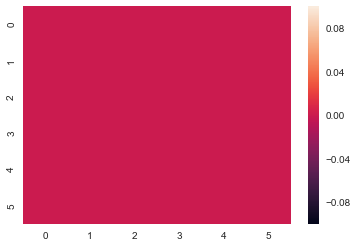

In [46]:
sH2_1 = scf.hf.get_ovlp(H2_1)
sH2_2 = scf.hf.get_ovlp(H2_2)

print(np.mean(np.abs(sH2_1 - sH2_2)))

sns.heatmap(sH2_1-sH2_2)
plt.show()

### Density 

-1.1384122811097797e-18


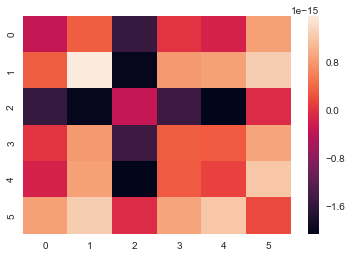

In [50]:
def calculate_density(mol):
    mf = scf.RHF(mol)
    mf.verbose = 0
    mf.scf()
    return mf.make_rdm1()

pH2_1 = calculate_density(H2_1)
pH2_2 = calculate_density(H2_2)
print(np.mean(pH2_1 - pH2_2))

sns.heatmap(pH2_1 - pH2_2)
plt.show()

# Ausgangsmolecule

in x direction

In [37]:
mol = gto.Mole()
mol.atom = """
F 0.0 0.0 0.0
H 1.0 0.0 0.0
"""
mol.basis = "sto-3g"

mol.build()

In [38]:
s = scf.hf.get_ovlp(mol)
print(s)

[[1.         0.23798988 0.         0.         0.         0.04057559]
 [0.23798988 1.         0.         0.         0.         0.39514046]
 [0.         0.         1.         0.         0.         0.31965214]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.04057559 0.39514046 0.31965214 0.         0.         1.        ]]


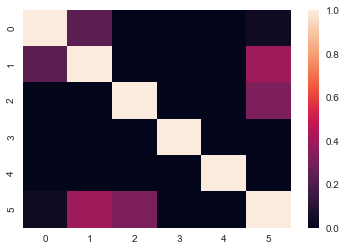

In [39]:
sns.heatmap(s)
plt.show()

# 90 ° Rotation 
in y direction

In [40]:
mol90 = gto.Mole()
mol90.atom = """
F 0.0 0.0 0.0
H 0.0 1.0 0.0
"""
mol90.basis = "sto-3g"
mol90.build()

s90 = scf.hf.get_ovlp(mol90)
print(s90)

[[1.         0.23798988 0.         0.         0.         0.04057559]
 [0.23798988 1.         0.         0.         0.         0.39514046]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.31965214]
 [0.         0.         0.         0.         1.         0.        ]
 [0.04057559 0.39514046 0.         0.31965214 0.         1.        ]]


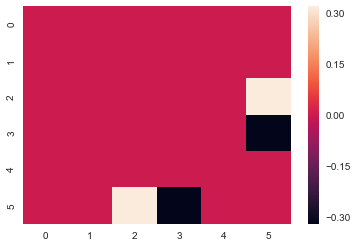

In [41]:
sns.heatmap((s - s90))

1.2118434812747587e-15


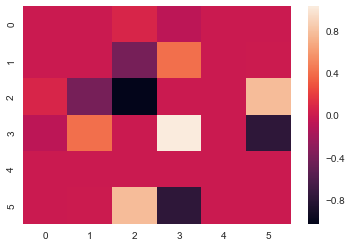

In [47]:
pMol = calculate_density(mol)
pMol90 = calculate_density(mol90)
print(np.mean(pMol - pMol90))

sns.heatmap(pMol - pMol90)

# Rotation of the Basis 

## Rotation Matrix 

In [33]:
def rotation_z(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
rotation_z(np.pi/2)

array([[ 6.123234e-17, -1.000000e+00,  0.000000e+00],
       [ 1.000000e+00,  6.123234e-17,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00]])

## Orbitals in the Molecule 

In [ ]:
k = [
    (0,  0), # 1s  of F
    (0,  0), # 2s  of F
    (1,  1), # 2px of F
    (1, -1), # 2py of F
    (1,  0), # 2pz of F
    (0,  0), # 1s  of H
]